In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import scipy.interpolate as inter
import plotly.express as px
from sklearn import preprocessing as skprep
import numba
import timeit
from lagrange import Lagrange

Compiled


In [3]:
df = pd.read_csv("DataSet3_1.csv", sep=',')
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df["OAT (F)"] = df["OAT (F)"].astype(float)
df = df.rename(columns={"OAT (F)": "OAT", "Power (kW)": "Power"})
df = df.drop(df.loc[(df["OAT"] == 0) | (df["Power"] == 0)].index)
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34915 entries, 0 to 34939
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  34915 non-null  datetime64[ns]
 1   OAT        34915 non-null  float64       
 2   Power      34915 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.1 MB


In [4]:
df

,Timestamp,OAT,Power
0,2010-01-01 01:15:00,51.0,165.1
1,2010-01-01 01:30:00,51.0,151.6
2,2010-01-01 01:45:00,51.0,146.9
3,2010-01-01 02:00:00,51.0,153.7
4,2010-01-01 02:15:00,51.0,153.8
...,...,...,...
34935,2010-12-30 23:00:00,47.0,285.8
34936,2010-12-30 23:15:00,44.0,206.6
34937,2010-12-30 23:30:00,44.0,205.9
34938,2010-12-30 23:45:00,44.0,189.4


In [5]:
# df["OAT"] = df["OAT"].apply(lambda x: (x - 32) / 1.8)
# df

<AxesSubplot:>

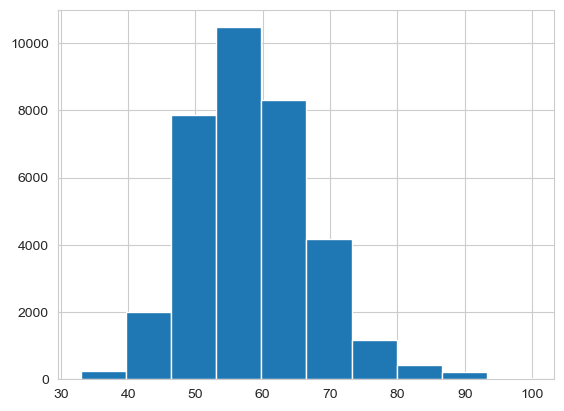

In [6]:
df["OAT"].hist()

<AxesSubplot:>

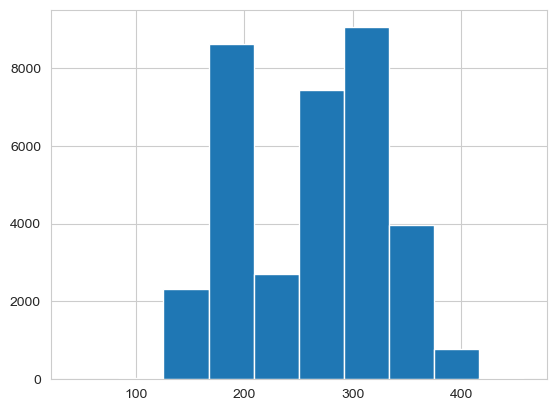

In [7]:
df["Power"].hist()

<AxesSubplot:>

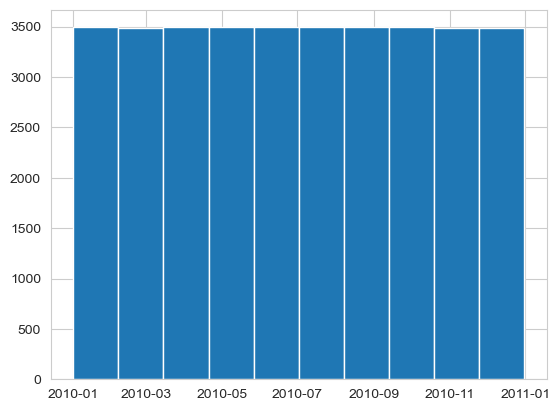

In [8]:
df["Timestamp"].hist()

На 6 элементах работает. Дать больше - едет крыша
UPD: сходит с ума из-за больших значений => нормализация данных позволяет поднять выборку до 18, далее всё равно едет крыша.

In [20]:
df_s = df.sample(15)
# df_s = df_s.reset_index(drop=True)
df_s = df_s.sort_values(by="Timestamp")
df_s

,Timestamp,OAT,Power
805,2010-01-09 10:30:00,47.0,260.9
1238,2010-01-13 22:45:00,52.0,282.9
4339,2010-02-15 06:00:00,46.0,158.2
13502,2010-05-21 16:45:00,62.0,291.5
13859,2010-05-25 10:00:00,59.0,284.2
15142,2010-06-07 18:45:00,66.0,309.8
18784,2010-07-15 17:15:00,79.0,313.2
19795,2010-07-26 06:00:00,60.0,256.5
23936,2010-09-07 09:15:00,61.0,299.3
24391,2010-09-12 03:00:00,60.0,181.7


In [21]:
def norm(x):
    return (x - x.min()) / (x.max() - x.min())

y = norm(df_s["Power"].values)
x = norm(df_s["Timestamp"].values.astype("float64"))

lag = inter.lagrange(x, y)

In [22]:
# lag, len(lag)

In [23]:
my_lag = Lagrange(x, y)

In [24]:
pd.DataFrame({"lag": lag(x), "my lag": my_lag(x), "y": y})

,lag,my lag,y
0,5.106912e-01,0.510691,0.510691
1,6.200895e-01,0.620090,0.620090
2,-8.079064e-10,0.000000,0.000000
3,6.628542e-01,0.662854,0.662854
4,6.265538e-01,0.626554,0.626554
5,7.538540e-01,0.753854,0.753854
6,7.707657e-01,0.770761,0.770761
7,4.888210e-01,0.488812,0.488812
8,7.016817e-01,0.701641,0.701641
9,1.169186e-01,0.116857,0.116857


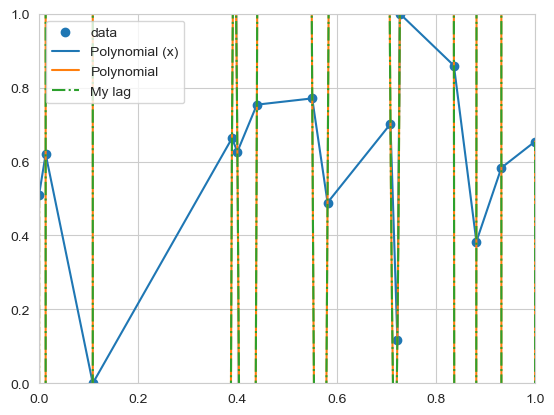

In [25]:
x_new = np.linspace(x.min(), x.max(), num=500, endpoint=True)  # np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
plt.scatter(x, y, label='data')
plt.plot(np.sort(x), lag(np.sort(x)), label='Polynomial (x)')
plt.plot(x_new, lag(x_new), label='Polynomial')
plt.plot(x_new, my_lag(x_new), '-.', label="My lag")
plt.legend(loc='best')
ax = plt.gca()
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
plt.show()

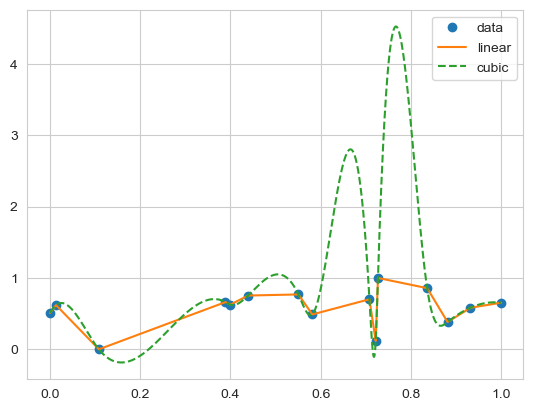

In [26]:
# x = df_s["Timestamp"].values.astype("float64")
# y = df_s["OAT"].values
# x = df["Timestamp"].values.astype("float64")
# y = df["OAT"].values
x_min = x.min()
x_max = x.max()
f = inter.interp1d(x, y)
f2 = inter.interp1d(x, y, kind='cubic')
xnew = np.linspace(x.min(), x.max(), num=60000, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

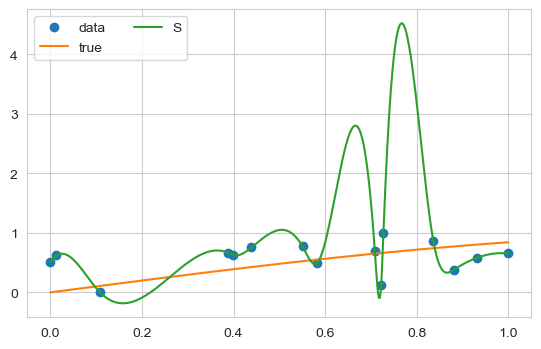

In [35]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, y)
xs = x_new
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
# ax.plot(xs, cs(xs, 1), label="S'")
# ax.plot(xs, cs(xs, 2), label="S''")
# ax.plot(xs, cs(xs, 3), label="S'''")
ax.legend(loc='best', ncol=2)
plt.show()